$\large \text{Answer 1:}
\text{As we know the appropriate choice of f is :} \\ f_i(w)=\frac{λ}{2n}||w||_2^2+\frac{1}{n}∑_{i=1}^nL(y_i,w^Tx_i)  \\ \text{so now }: f(w) = ∑_{i=1}^nf_i(w)$




In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
#check the shape of iris data
print(iris.data.shape)
A = iris.data
#Normalize columns of A so that all entries are in the range [-1,+1] 
for i in range(A.shape[1]):
    A[:,i] = -1+(((A[:,i]-min(A[:,i]))*2)/(max(A[:,i])-min(A[:,i])))
#check the shape of iris target
print(iris.target.shape)
num_of_classes = len(set(iris.target))
C=num_of_classes
print('Num of Classes: ',C)
n = iris.data.shape[0] #Number
d = iris.data.shape[1] #dimension

(150, 4)
(150,)
Num of Classes:  3


In [3]:
y = 1.0*np.ones([A.shape[0],])
for i in range(iris.target.shape[0]):
  if iris.target[i]!=1:
    y[i] = -1 # Convert class labels that are not 1 into -1
  else:
    pass

indexarr = np.arange(n) 
np.random.shuffle(indexarr) 
print(indexarr)
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_data = A[indexarr[0:int(0.8*n)]]
train_label = y[indexarr[0:int(0.8*n)]]
test_data = A[indexarr[int(0.8*n):]]
test_label = y[indexarr[int(0.8*n):]]

[126   5 114 119  30 123  19  41 132 102  44  13 148 131  83  27  95  49
 110 124  52  48 108 144 139  25  77  37  46 103  63  68  72  59 101   4
  74  17 113  34  14  45  85  73 111   7   2   0 117  70  38  80  98  82
  51  39 146  75  10  55  76  61  62 128 143 129  67  94  22  57  60  20
  40  50  90  23  54 122  24  47  91  56  87  81  71 134  12  86 140 138
  84  65  66 120   1  32   6 121  29  89   8  35 127 135   9  88 142 118
   3  92  21 145 106  28  18 136  99 130 112 100  53  11 125  79  33 109
  97 115  93 149 105  96  26 107  64  42  16 141  43  36  78  31 147 133
 104  69 137 116  15  58]


In [4]:
def predict(w,x):
  return [np.sign((w.T)@(np.reshape(x[i], [d,1]))) for i in range(len(x))]

def compute_accuracy(data,labels,model_w):
  total=0
  correct=0
  for x,y in zip(labels,predict(model_w,data)):
    if(x==y):
      correct+=1
    total+=1
  return correct*100/total

A  

array([[-5.55555556e-01,  2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -1.66666667e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-7.77777778e-01,  0.00000000e+00, -8.98305085e-01,
        -9.16666667e-01],
       [-8.33333333e-01, -8.33333333e-02, -8.30508475e-01,
        -9.16666667e-01],
       [-6.11111111e-01,  3.33333333e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-3.88888889e-01,  5.83333333e-01, -7.62711864e-01,
        -7.50000000e-01],
       [-8.33333333e-01,  1.66666667e-01, -8.64406780e-01,
        -8.33333333e-01],
       [-6.11111111e-01,  1.66666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-9.44444444e-01, -2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -8.33333333e-02, -8.30508475e-01,
        -1.00000000e+00],
       [-3.88888889e-01,  4.16666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-7.22222222e-01,  1.66666667e-01, -7.96610169e-01,
      

In [5]:
A.shape[1]

4

# **Ans 2:**

In [6]:
def compute_loss_h(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [0 if z[i]>=1 else (1-z[i]) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval(data,labels,model_w, lam):
  return np.mean(compute_loss_h(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2


def compute_grad_loss_h(x,y,model_w,lamda):
  x = np.reshape(x,[d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  if z >=1:
    grad = (lamda/n)*model_w
  if z <1:
    grad = ((1/n)*(-y*x) + (lamda/n)*model_w)
  return grad  

# **Ans 3:**

In [7]:
def orthogonal_proj(z):
  ortho_proj = np.ones(len(z[0]))
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :
    ortho_proj = z
  else:
    for i in range(len(z[0])):
      ortho_proj[i] = ortho_proj[i]/np.sum(abs(z[i][0]) for i in range(len(z)))
  return ortho_proj

# **Ans 4:**

In [8]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_h(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [9]:
w=np.random.normal(0,0.1,(d,1))
print(w)

[[-0.11719252]
 [-0.0817711 ]
 [ 0.06770389]
 [-0.02852585]]


In [10]:
np.linalg.norm(5.3)

5.3

In [11]:
w[1][0]

-0.08177109906498714

In [12]:
np.ones(13)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-7-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


# **(a)**

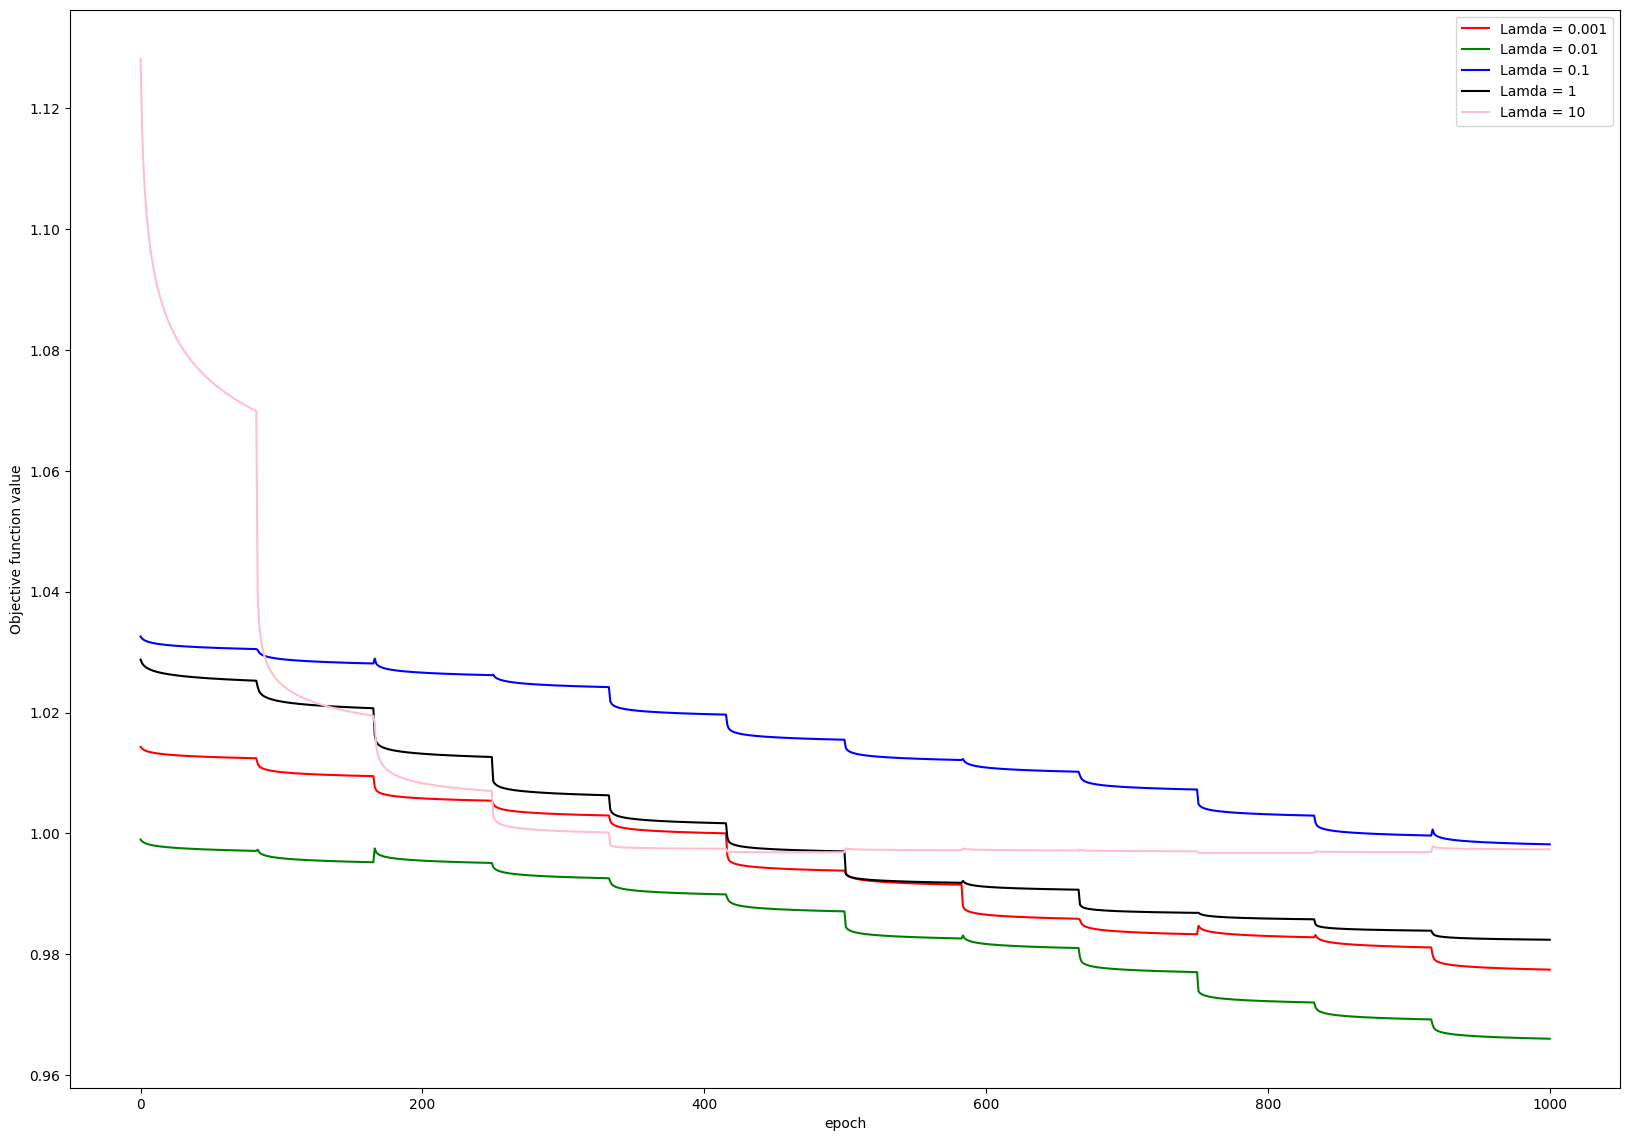

In [14]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (20,14))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

# **(b)**

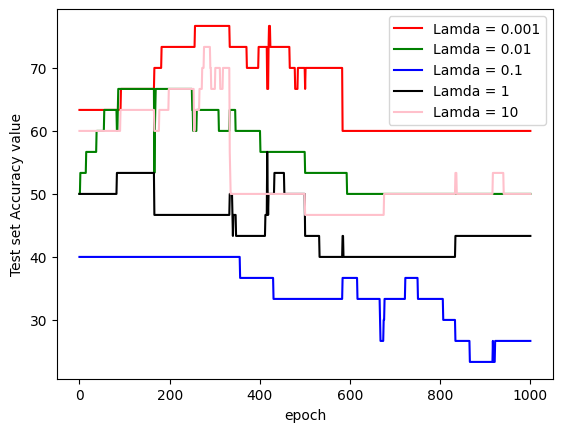

In [15]:
plt.legend(loc = 'upper right')
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

# **(c)**

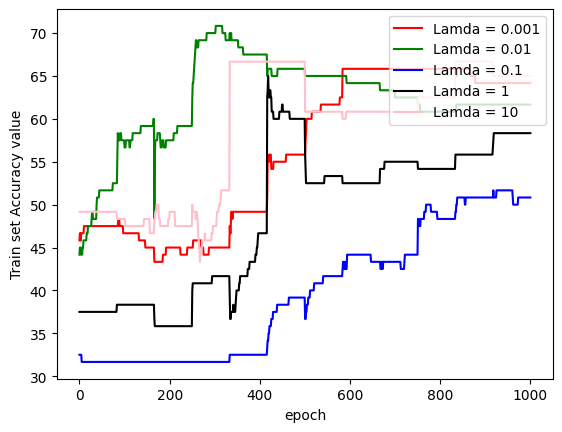

In [16]:
plt.legend(loc = 'upper right')
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

# **(d)**

In [17]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 |        60.0         |  64.16666666666667   |
| 0.01  |        50.0         |  61.666666666666664  |
|  0.1  | 26.666666666666668  |  50.833333333333336  |
|   1   | 43.333333333333336  |  58.333333333333336  |
|  10   |        50.0         |         65.0         |
+-------+---------------------+----------------------+


I get good accuracy for lambda = 0.001 and 0.01 for test accuracy and for train accuracy lambda = 0.001 and 10 gives best accuracy.
The minimum value of function is obtained more efficiently for lamda = 0.01 and 0.001 as clear from the plot.

# **(e)**

# **Ans 5:**

 For logistic loss

In [18]:
def compute_loss_l(w,x,y):
  z = np.zeros(len(y))
  #print(w.shape)
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  #print(z)
  loss = [np.log(1+np.exp(-z[i])) for i in range(len(z))]
  return np.array(loss)

def compute_objfnval2(data,labels,model_w, lam):
  return np.mean(compute_loss_l(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2  

def compute_grad_loss_l(x,y,model_w, lam):
  x = np.reshape(x, [d,1])
  model_w = np.reshape(model_w, [d,1])
  z = (y*np.matmul(model_w.T, x)).item()
  #print(z)
  grad = -((1/n)* y*x* np.exp(-z))/(1+np.exp(-z)) + (lam/n)*model_w
  return grad  

In [19]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_l(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval2(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [20]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-7-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


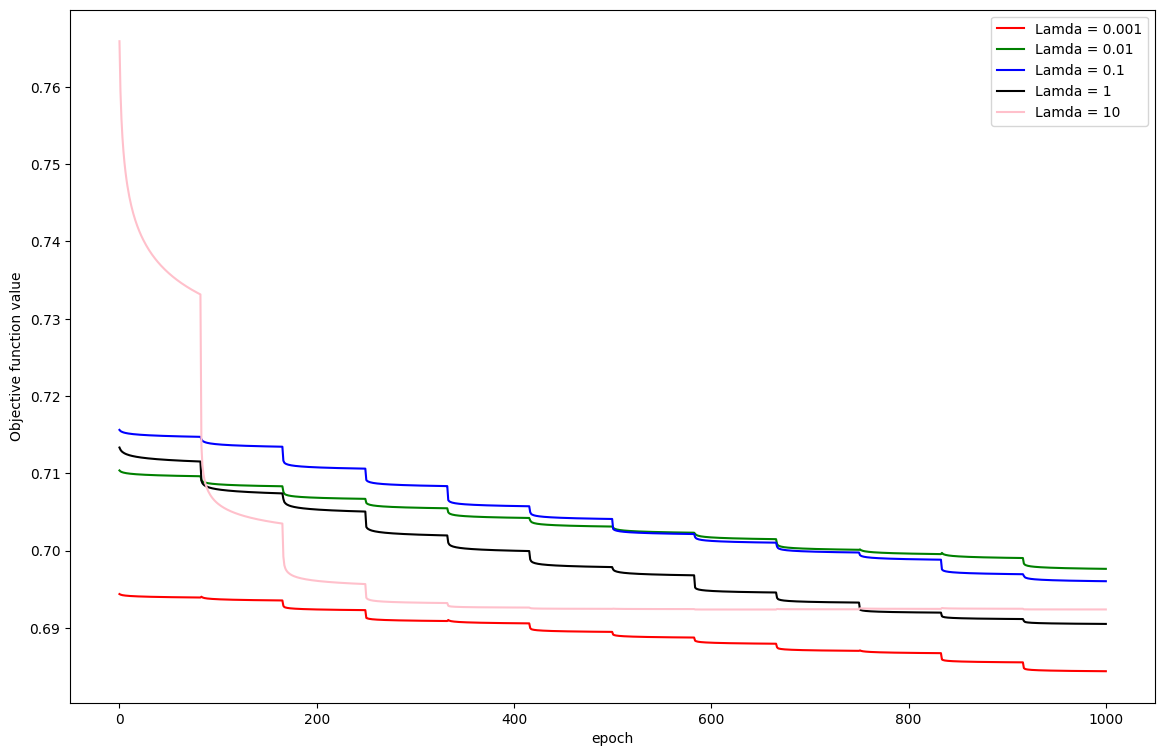

In [21]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (14,9))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

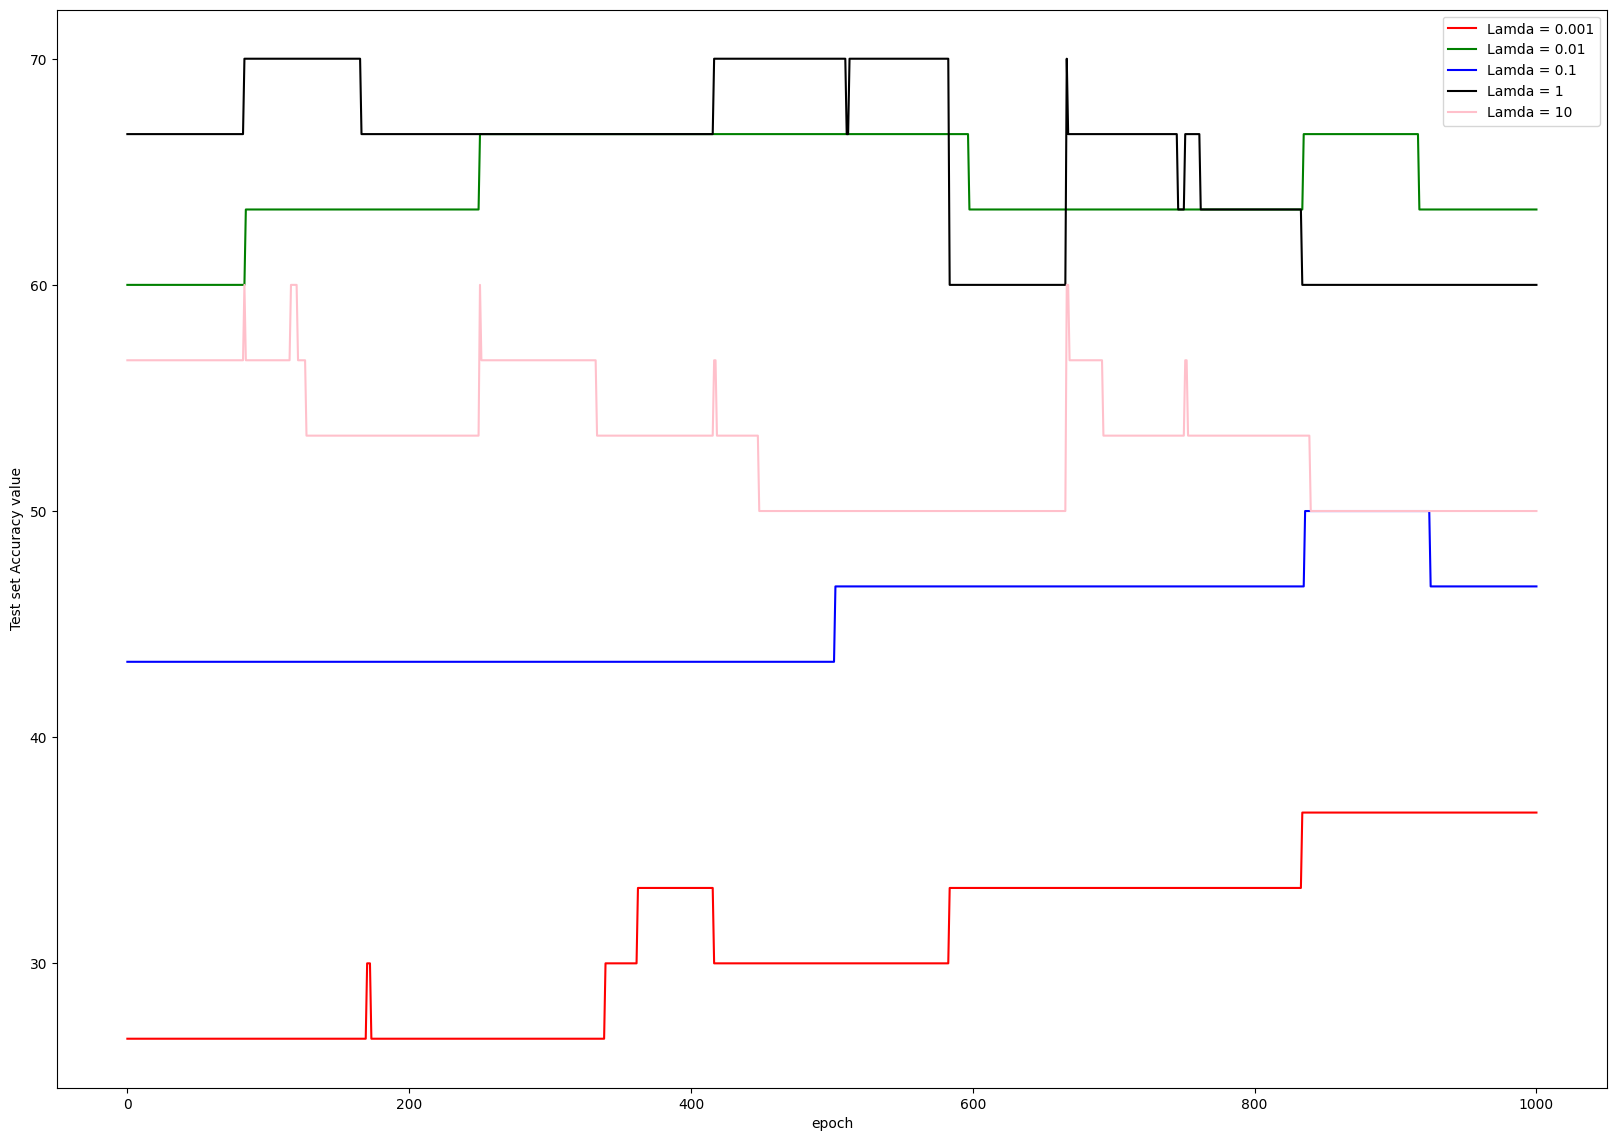

In [22]:
plt.figure(figsize = (20,14))
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()




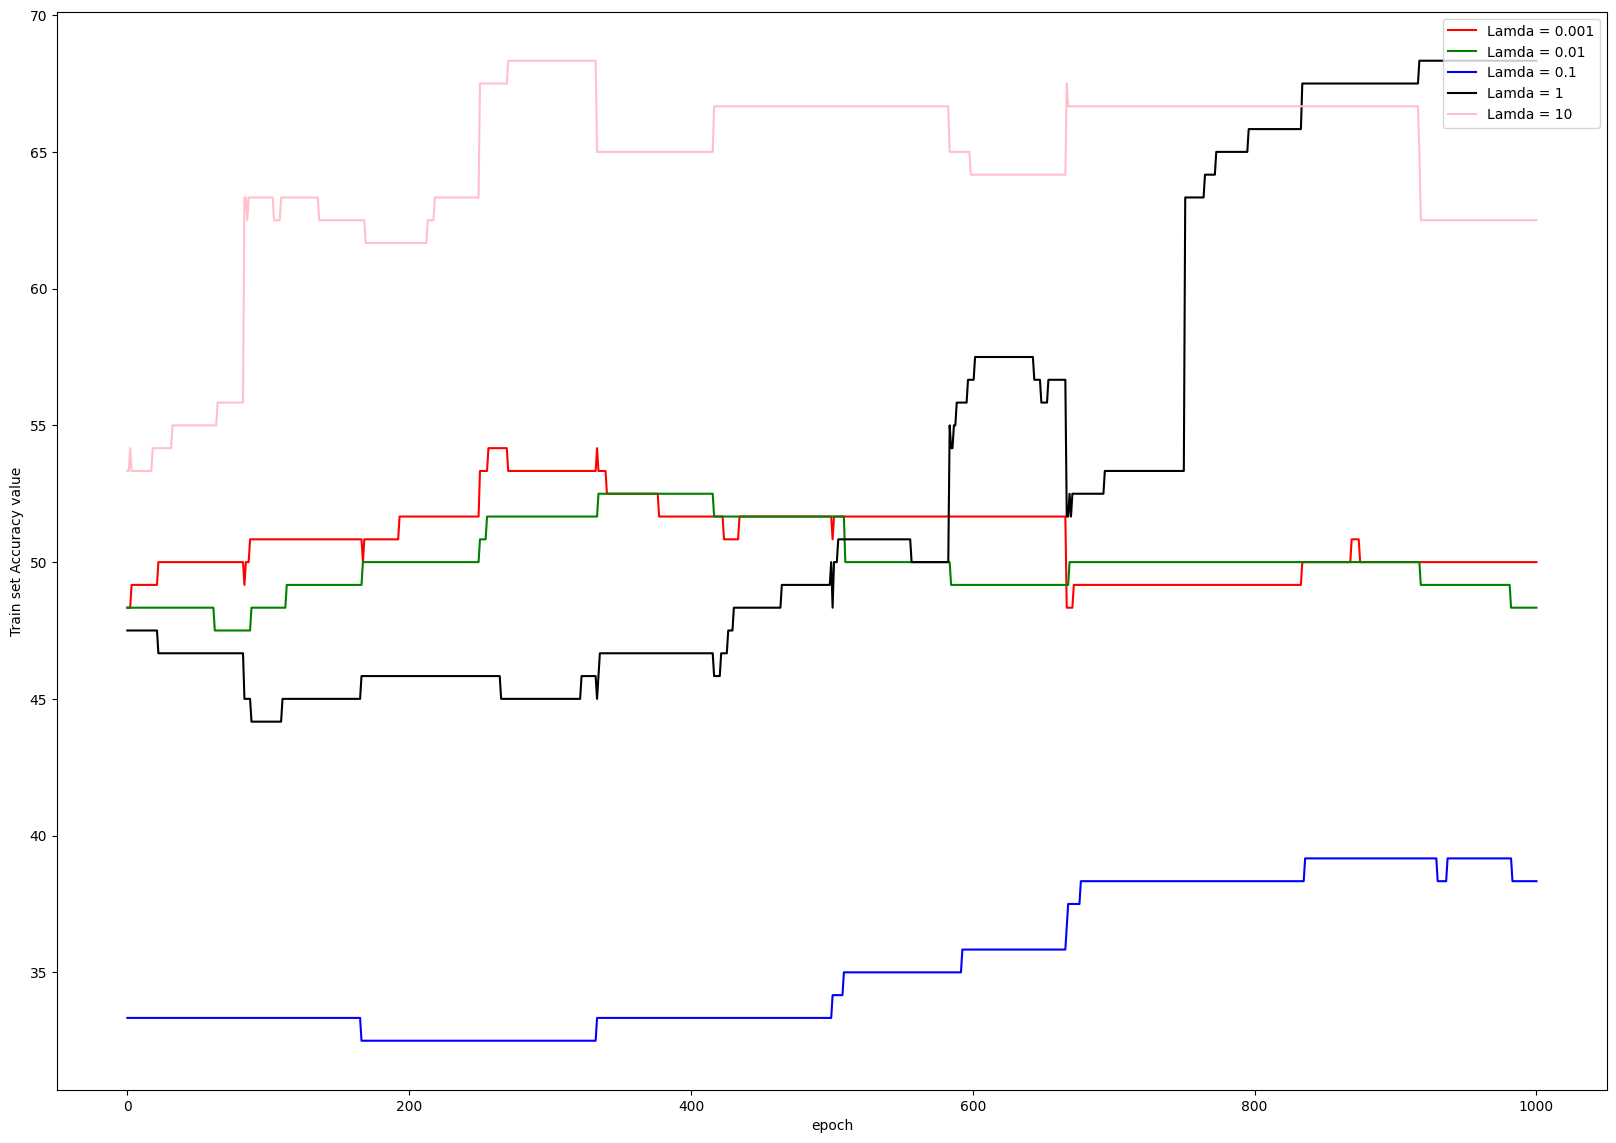

In [23]:
plt.figure(figsize = (20,14))
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

In [24]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 | 36.666666666666664  |         50.0         |
| 0.01  | 63.333333333333336  |  48.333333333333336  |
|  0.1  | 46.666666666666664  |  38.333333333333336  |
|   1   |        60.0         |  68.33333333333333   |
|  10   |        50.0         |         62.5         |
+-------+---------------------+----------------------+


here for test accuracy lamda = 1 and 0.01 gives best accuracy and for train accuracy lambda = 1 and 10 gives best accuracy.

For Squared Hinge loss:

In [25]:
def compute_loss_sh(w,x,y):
  z = np.zeros(len(y))
  w = np.reshape(w, [d,1])
  for i in range(len(y)):
    z[i] = (y[i]*np.matmul(w.T, np.reshape(x[i], [d,1]))).item()

  return np.array([0 if z[i]>=1 else (1-z[i])**2 for i in range(len(z))])

def compute_objfnval3(data,labels,model_w, lam):
  return np.mean(compute_loss_sh(model_w,data,labels))+ (lam/2)*np.linalg.norm(model_w,2)**2

def compute_grad_loss_sh(x,y,model_w, lam):
 x = np.reshape(x, [d,1])
 model_w = np.reshape(model_w, [d,1])
 z = (y*np.matmul(model_w.T, x)).item()
 if z >=1:
   grad = (lam/n)*model_w
 if z <1:
   grad = ((2/n)*(-y* x)*(1-z) + (lam/n)*model_w)
 return grad    

In [26]:
def OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs): 
  t=1
  #initialize w
  w = np.random.normal(0,0.1,(d,1))
  arr = np.arange(train_data.shape[0])
  obj = []
  train = []
  test = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/t
      # Update w using w <- Proj_C(w - step * g_i (w))
      w = orthogonal_proj(w-step*compute_grad_loss_sh(train_data[i],train_label[i],w,lamda))
      t = t+1
      if t>1e4:
        t=1 
    obj.append(compute_objfnval3(train_data,train_label,w, lamda))
    train.append(compute_accuracy(train_data,train_label,w))
    test.append(compute_accuracy(test_data,test_label,w))
  return w,obj,train,test

In [27]:
num_epochs = 1000
Lamda_values = [1e-3,1e-2,0.1,1,10]
Obj_Values = []
Test_Accs = []
Train_Accs = []
W_s = []
for lamda in Lamda_values:
  w,obj,train,test = OPT1(train_data,train_label,test_data,test_label,lamda, num_epochs)
  W_s.append(w)
  Obj_Values.append(obj)
  Test_Accs.append(test)
  Train_Accs.append(train)

<ipython-input-7-a14aeb879dab>:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if np.sum(abs(z[i][0]) for i in range(len(z[0])))<=1 :


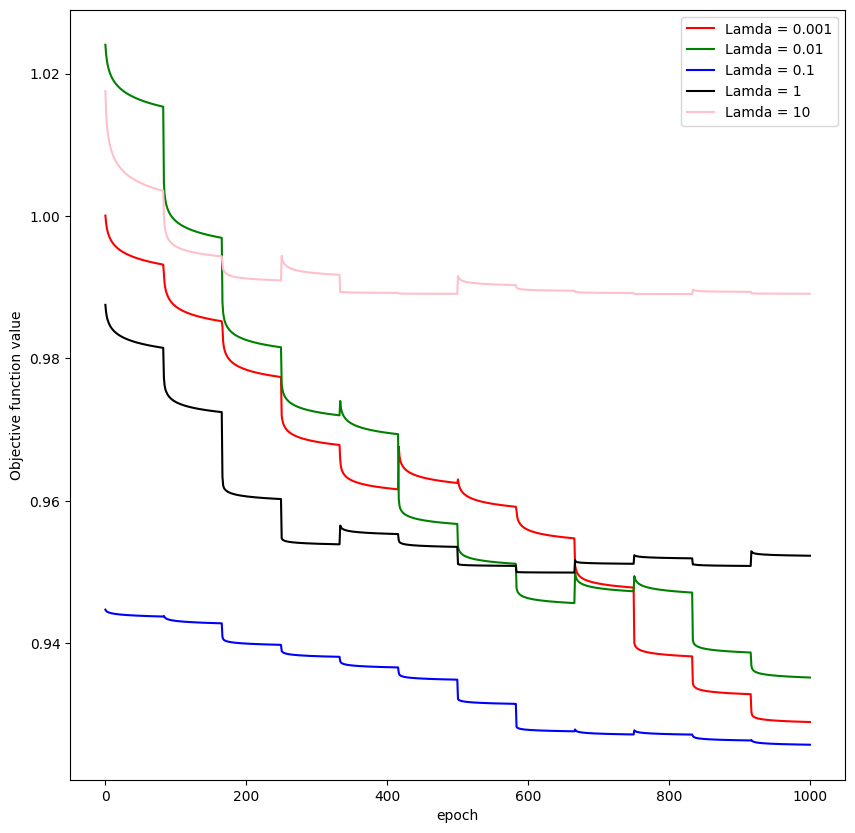

In [28]:
Colors = ['red','green','blue','black','pink']
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.ylabel('Objective function value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Obj_Values[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Obj_Values[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Obj_Values[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Obj_Values[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Obj_Values[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()



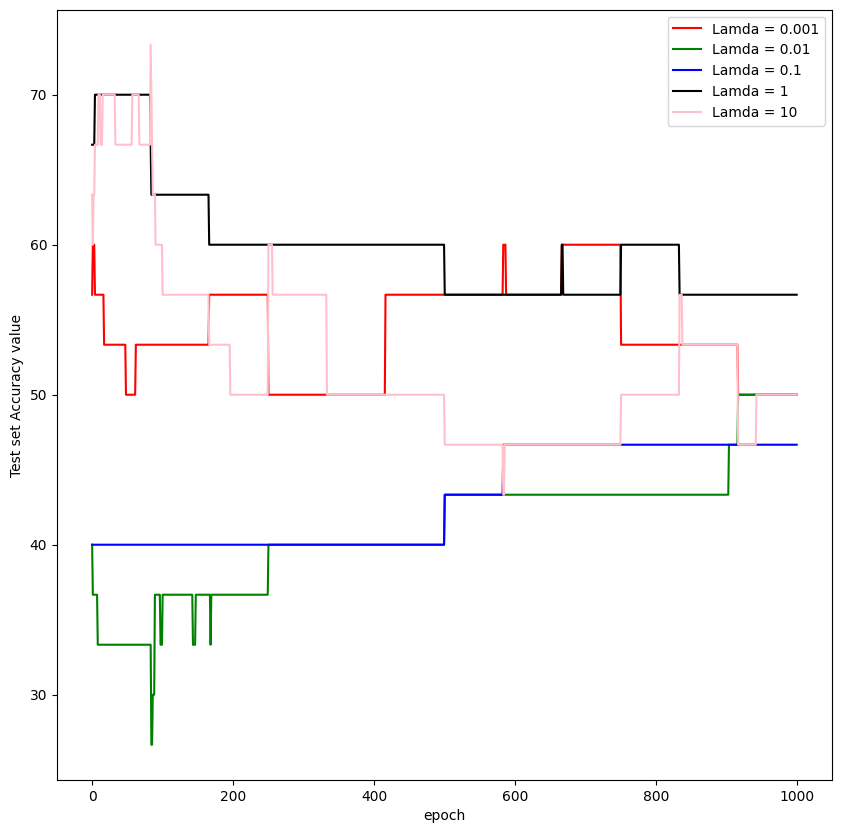

In [29]:
plt.figure(figsize = (10,10))
plt.ylabel('Test set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Test_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Test_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Test_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Test_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Test_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

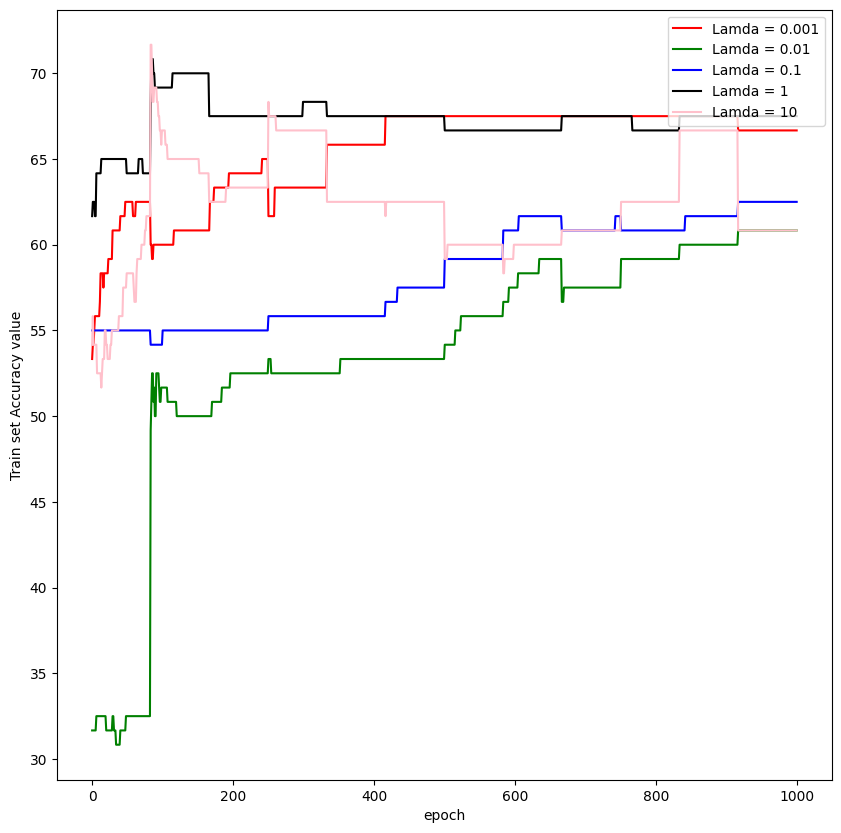

In [30]:
plt.figure(figsize = (10,10))
plt.ylabel('Train set Accuracy value')
plt.xlabel('epoch')
x = np.linspace(0,1000,1000)
plt.plot( x, Train_Accs[0],color = Colors[0],label = 'Lamda = 0.001')
plt.plot( x, Train_Accs[1],color = Colors[1],label = 'Lamda = 0.01')
plt.plot( x, Train_Accs[2],color = Colors[2],label = 'Lamda = 0.1')
plt.plot( x, Train_Accs[3],color = Colors[3],label = 'Lamda = 1')
plt.plot( x, Train_Accs[4],color = Colors[4],label = 'Lamda = 10')
plt.legend(loc = 'upper right')
plt.show()

In [31]:
from tabulate import tabulate
data = [[Lamda_values[i],Test_Accs[i][-1],Train_Accs[i][-1]] for i in range(len(Lamda_values))]
head = ['Lamda','Final Test Accuracy','Final Train Accuracy']
print(tabulate(data, headers=head, tablefmt="pretty"))

+-------+---------------------+----------------------+
| Lamda | Final Test Accuracy | Final Train Accuracy |
+-------+---------------------+----------------------+
| 0.001 |        50.0         |  66.66666666666667   |
| 0.01  |        50.0         |  60.833333333333336  |
|  0.1  | 46.666666666666664  |         62.5         |
|   1   | 56.666666666666664  |         67.5         |
|  10   |        50.0         |  60.833333333333336  |
+-------+---------------------+----------------------+


here for test accuracy lambda = 0.01 and 1 gives best accuracy and for train lamda = 1 and 0.001 gives best accuracy. Here also we get quite low accuracy for each, so it is not a good loss function used for this function.